In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
dfmt = pd.read_csv("/content/Algerian_forest_fires_cleaned.csv")
dfmt.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [145]:
# drop month,day and year
dfmt.drop(['month','day','year'], axis=1, inplace=True)

In [146]:
dfmt.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [147]:
dfmt['Classes'].value_counts()

,count
Classes,
fire,137
not fire,106


In [148]:
 # Encoding Classes column
dfmt['Classes'] = dfmt['Classes'].map({'not fire': 0, 'fire': 1})

In [149]:
dfmt.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [150]:
dfmt['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [151]:
## Independant and dependant features
X = dfmt.drop('FWI', axis=1)
y = dfmt['FWI']

In [152]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [153]:
y.head()

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5


In [154]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [155]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

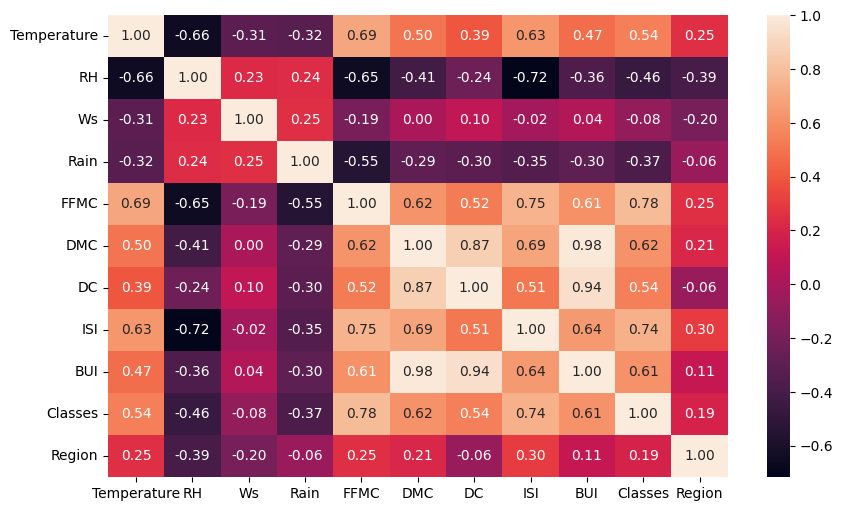

In [156]:
correlation = X_train.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.show()

In [157]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0,0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,0,1
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,1,1
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0,0


In [158]:
def drop_correlated_features(X_train, X_test, threshold=0.85):
    corr_matrix = X_train.corr().abs()
    to_drop = set()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold:
                colname1 = corr_matrix.columns[i]
                to_drop.add(colname1)

    X_train_reduced = X_train.drop(columns=list(to_drop))
    X_test_reduced  = X_test.drop(columns=list(to_drop))

    return X_train_reduced, X_test_reduced, to_drop

In [159]:
X_train_reduced, X_test_reduced, to_drop = drop_correlated_features(X_train, X_test)

In [160]:
to_drop

{'BUI', 'DC'}

In [161]:
X_train_reduced.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0


In [162]:
X_train_reduced.shape,X_test_reduced.shape

((182, 9), (61, 9))

# **Feature Scaling or Standardization**

In [163]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)

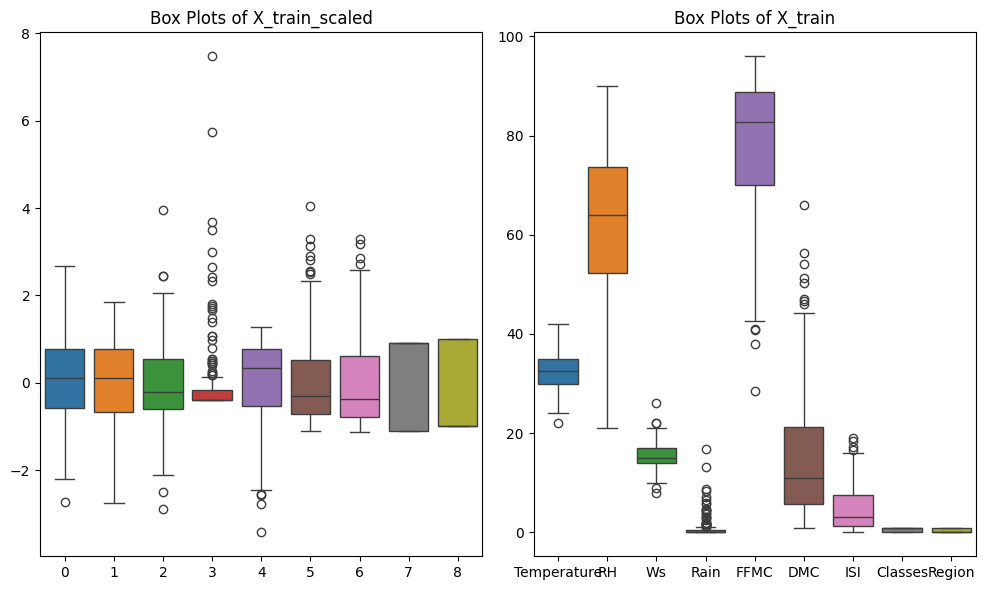

In [164]:
# Box plots to understand the effects of StandardScaler
# Box plots to understand the effects of StandardScaler
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=X_train_scaled)
plt.title('Box Plots of X_train_scaled')

plt.subplot(1, 2, 2)  # Changed from (1, 2, 1) to (1, 2, 2)
sns.boxplot(data=X_train_reduced)
plt.title('Box Plots of X_train')

plt.tight_layout()  # Adjusts spacing between subplots
plt.show()  # Only call once at the end

# **Linear Regression Model**

Mean Absolute Error: 0.5468236465249986
R2 Score: 0.9847657384266951


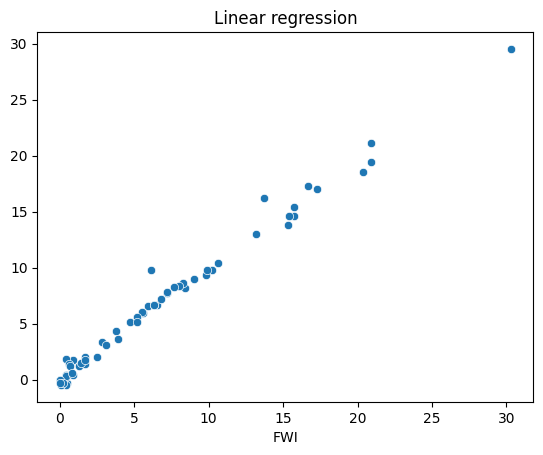

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled,y_train)
y_pred = linear_regressor.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {score}")
scatter_plot = sns.scatterplot(x=y_test, y=y_pred)
plt.title("Linear regression")
plt.show()

# **Lasso Regression Model**

Mean Absolute Error: 1.133175994914409
R2 Score: 0.9492020263112388


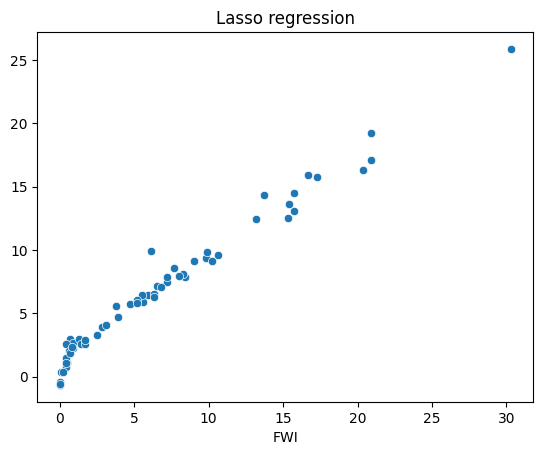

In [166]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {score}")
scatter_plot = sns.scatterplot(x=y_test, y=y_pred)
plt.title("Lasso regression")
plt.show()

# **Ridge Regression Model**

Mean Absolute Error: 0.5642305340105692
R2 Score: 0.9842993364555513


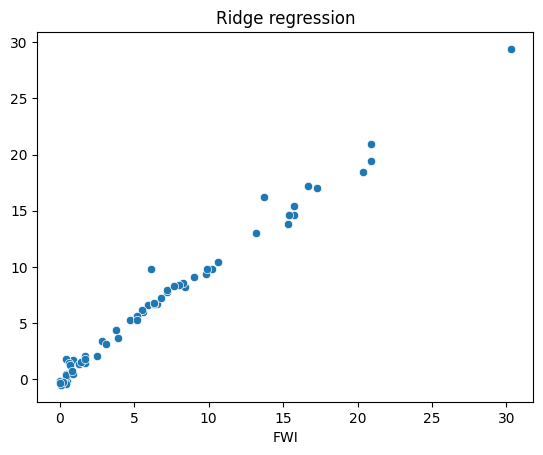

In [167]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {score}")
scatter_plot = sns.scatterplot(x=y_test, y=y_pred)
plt.title("Ridge regression")
plt.show()

# **Elasticnet Regression Model**

Mean Absolute Error: 1.8822353634896005
R2 Score: 0.8753460589519703


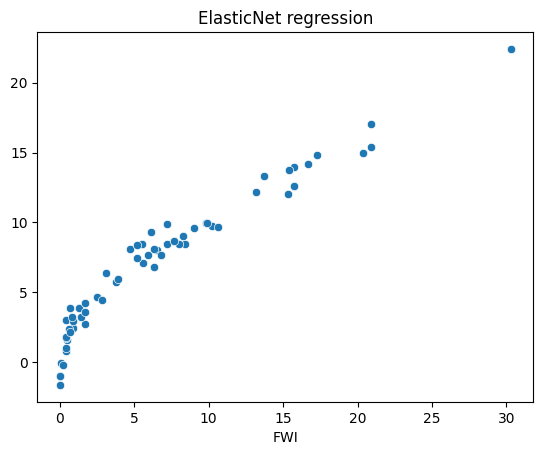

In [168]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
elasticNet = ElasticNet()
elasticNet.fit(X_train_scaled,y_train)
y_pred = elasticNet.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {score}")
scatter_plot = sns.scatterplot(x=y_test, y=y_pred)
plt.title("ElasticNet regression")
plt.show()

# **Cross Validation Lasso**

In [170]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [176]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9